Index(['Passive', 'Auto Attack', 'Move 1', 'Move 1A', 'Move 1B', 'Move 2',
       'Move 2A', 'Move 2B', 'Unite Move'],
      dtype='object')


C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: F

C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


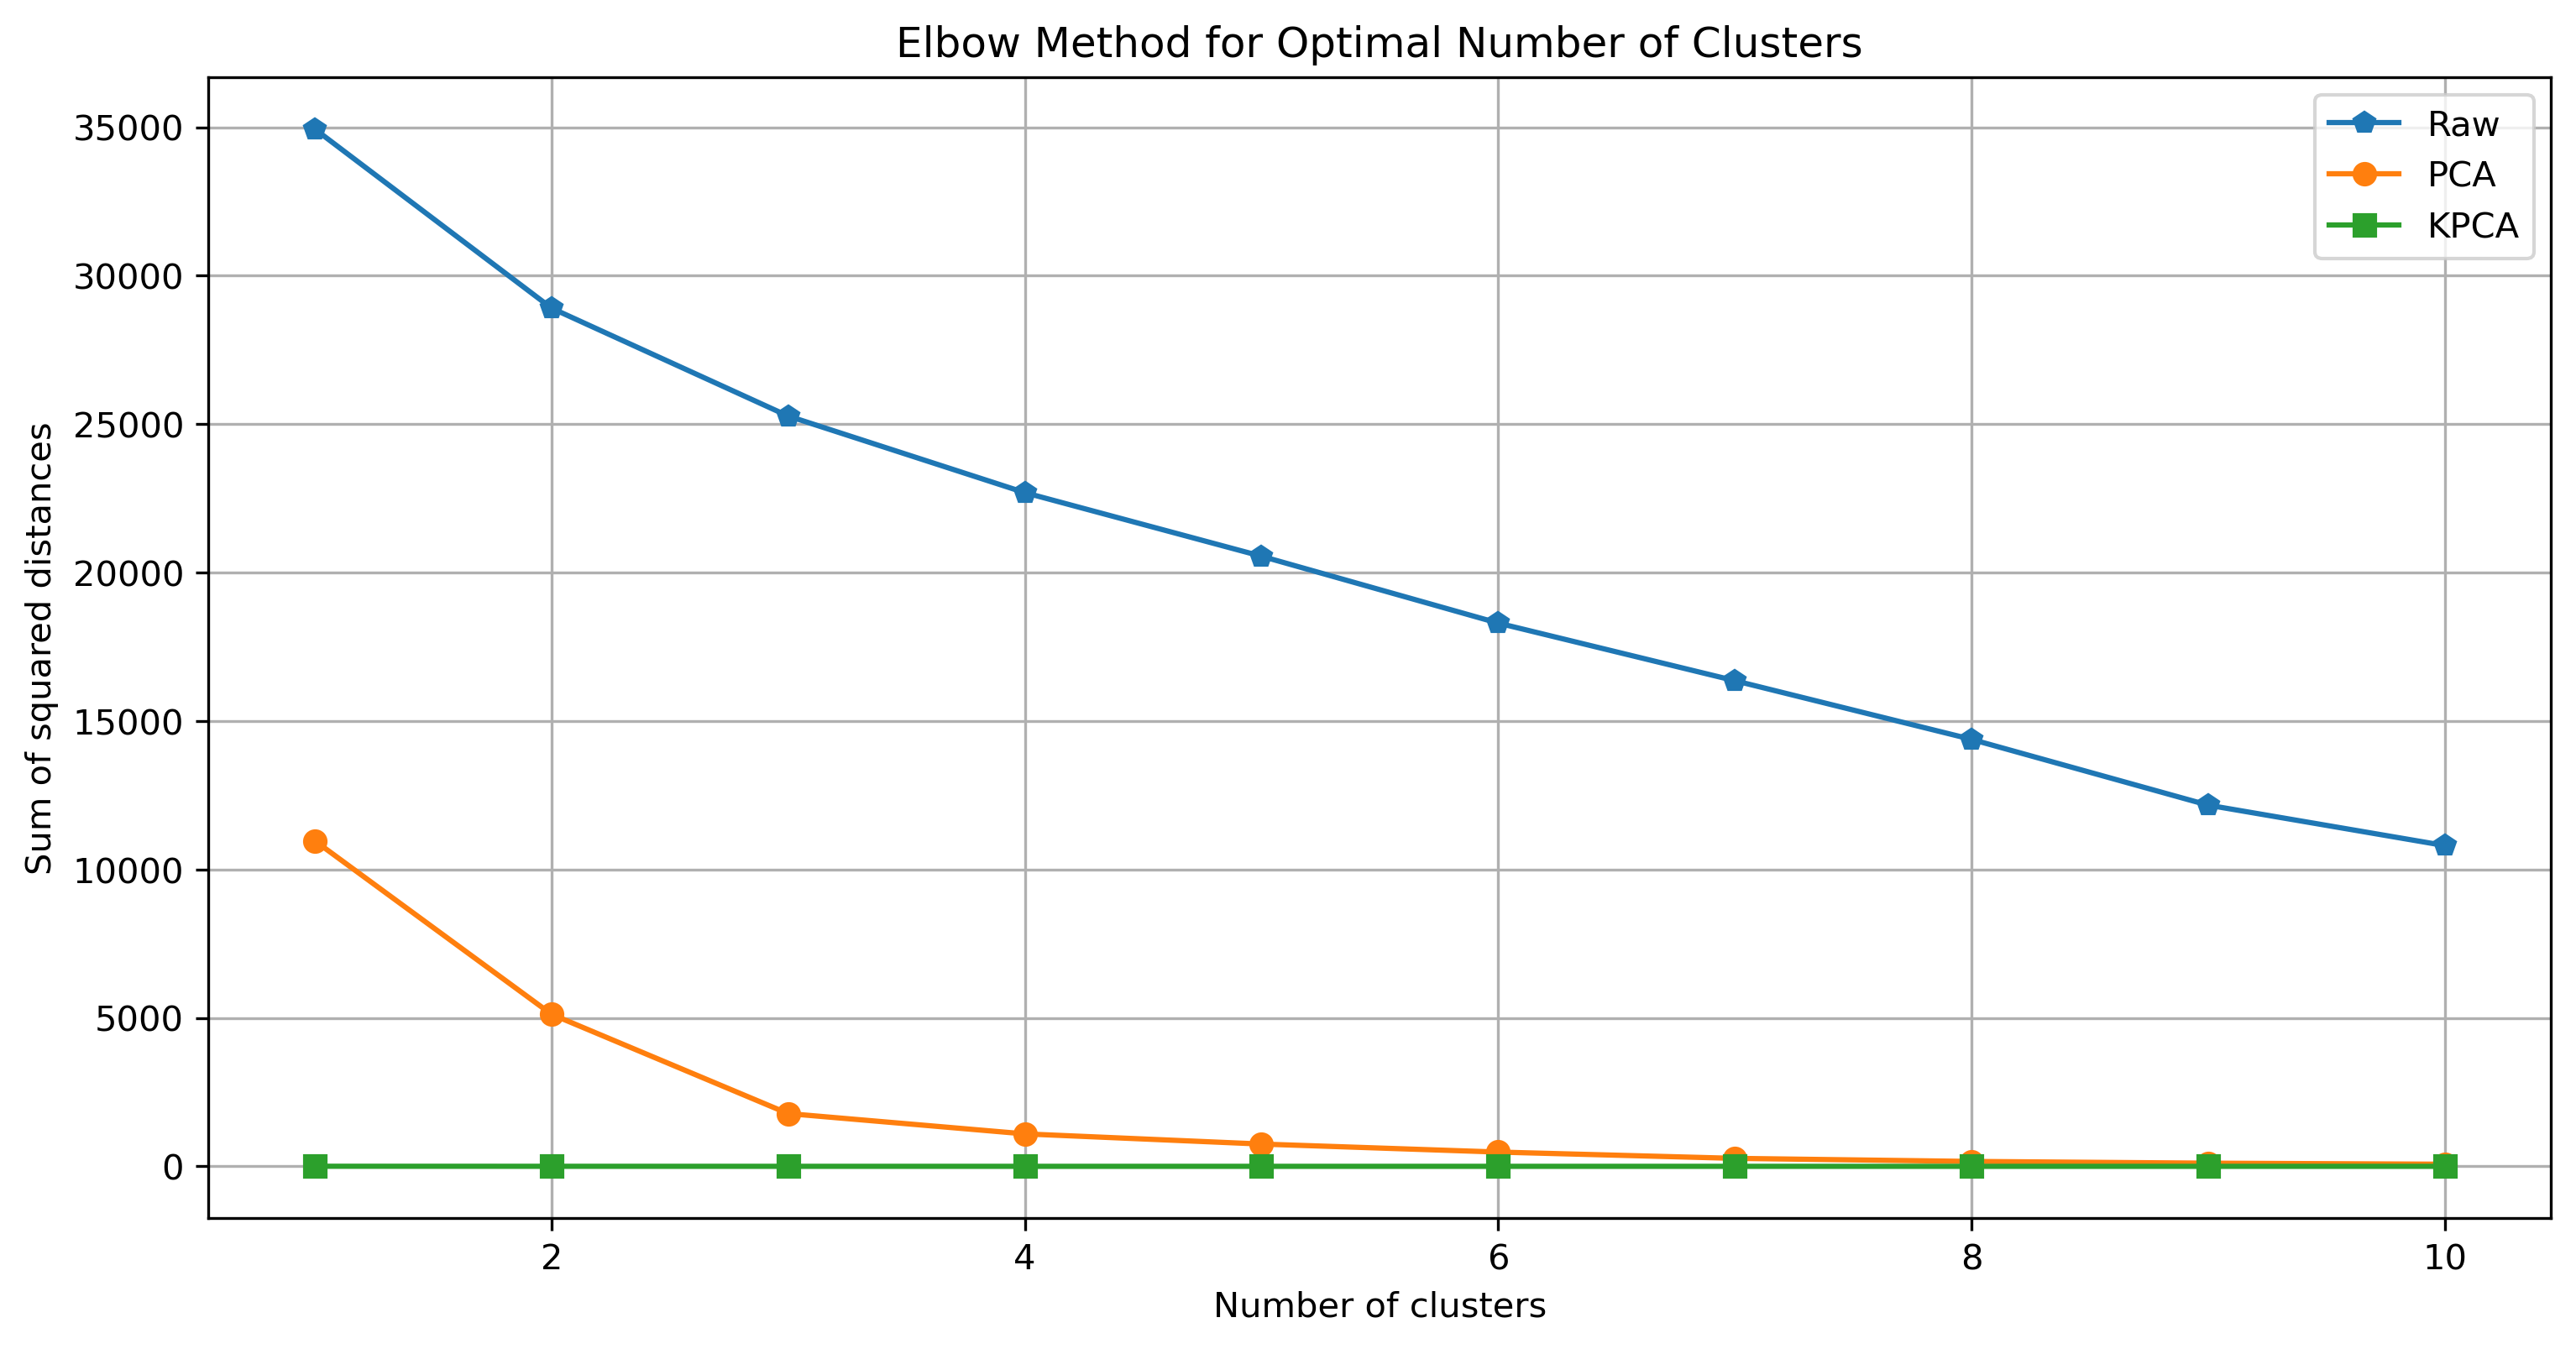

In [6]:
#### from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv("Pokemon Data 1.5.csv")
# Drop the first column and normalize the remaining data
labels = data.iloc[:,0]
data_values = data.drop(columns=['Pokemon'])
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Select the text columns to be vectorized
text_columns = data_values.select_dtypes(include=['object']).columns
print(text_columns)
# Create an empty DataFrame to store the tf-idf features
tfidf_features = pd.DataFrame()

# Apply TfidfVectorizer to each text column
for column in text_columns:
    tfidf_matrix = tfidf_vectorizer.fit_transform(data_values[column].astype('U'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{i}" for i in range(tfidf_matrix.shape[1])])
    tfidf_features = pd.concat([tfidf_features, tfidf_df], axis=1)

# Drop the original text columns from data_values
data_values = data_values.drop(columns=text_columns)

# Concatenate the original data_values with the tfidf_features DataFrame
data_values = pd.concat([data_values, tfidf_features], axis=1)
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_values)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Perform Kernel PCA with 2 components
kpca = KernelPCA(n_components=2, kernel='rbf')
kpca_data = kpca.fit_transform(scaled_data)

# Convert PCA and KPCA results to dataframes for easy handling
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
kpca_df = pd.DataFrame(kpca_data, columns=['KPCA1', 'KPCA2'])

# Display the first few rows of the PCA and KPCA results
(labels.head(),pca_df.head(), kpca_df.head())

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to determine the optimal number of clusters
def elbow_method(data):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    return sse

# Plot the elbow method for PCA data
reg_sse = elbow_method(scaled_data)
pca_sse = elbow_method(pca_df)
kpca_sse = elbow_method(kpca_df)

plt.figure(figsize=(12, 6), dpi=300)
plt.plot(range(1, 11), reg_sse, marker='p', label='Raw')
plt.plot(range(1, 11), pca_sse, marker='o', label='PCA')
plt.plot(range(1, 11), kpca_sse, marker='s', label='KPCA')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


Index(['Passive', 'Auto Attack', 'Move 1', 'Move 1A', 'Move 1B', 'Move 2',
       'Move 2A', 'Move 2B', 'Unite Move'],
      dtype='object')


C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jaylo\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



       Pokemon        PC1        PC2  0
0        Absol -14.682679  55.526485  2
1    Aegislash   5.611585  11.546913  6
2    Azumarill  45.149719   2.674233  1
3    Blastoise  -6.065201  -4.404059  7
4     Blaziken  25.621604  -0.906314  3
5      Blissey -11.636615 -10.279799  0
6     Buzzwole  -6.533701  -7.066363  0
7    Ceruledge  -6.300273   4.224195  7
8   Chandelure  -5.628207  -2.113635  7
9    Charizard  -8.733772  -1.522407  7
10   Cinderace -11.017243 -10.299096  0
11    Clefable  -3.241895  -4.634200  7
12      Comfey  -1.955234  -1.304733  7
13   Cramorant -15.432771 -20.183642  5
14     Crustle -10.264235 -10.122670  0
15   Decidueye  -1.373122  -1.052037  7
16     Delphox  51.262419  -0.640912  1
17      Dodrio  -6.094964  -6.338656  0
18   Dragapult  -7.988051  -6.644102  0
19   Dragonite -10.697367  13.540798  4


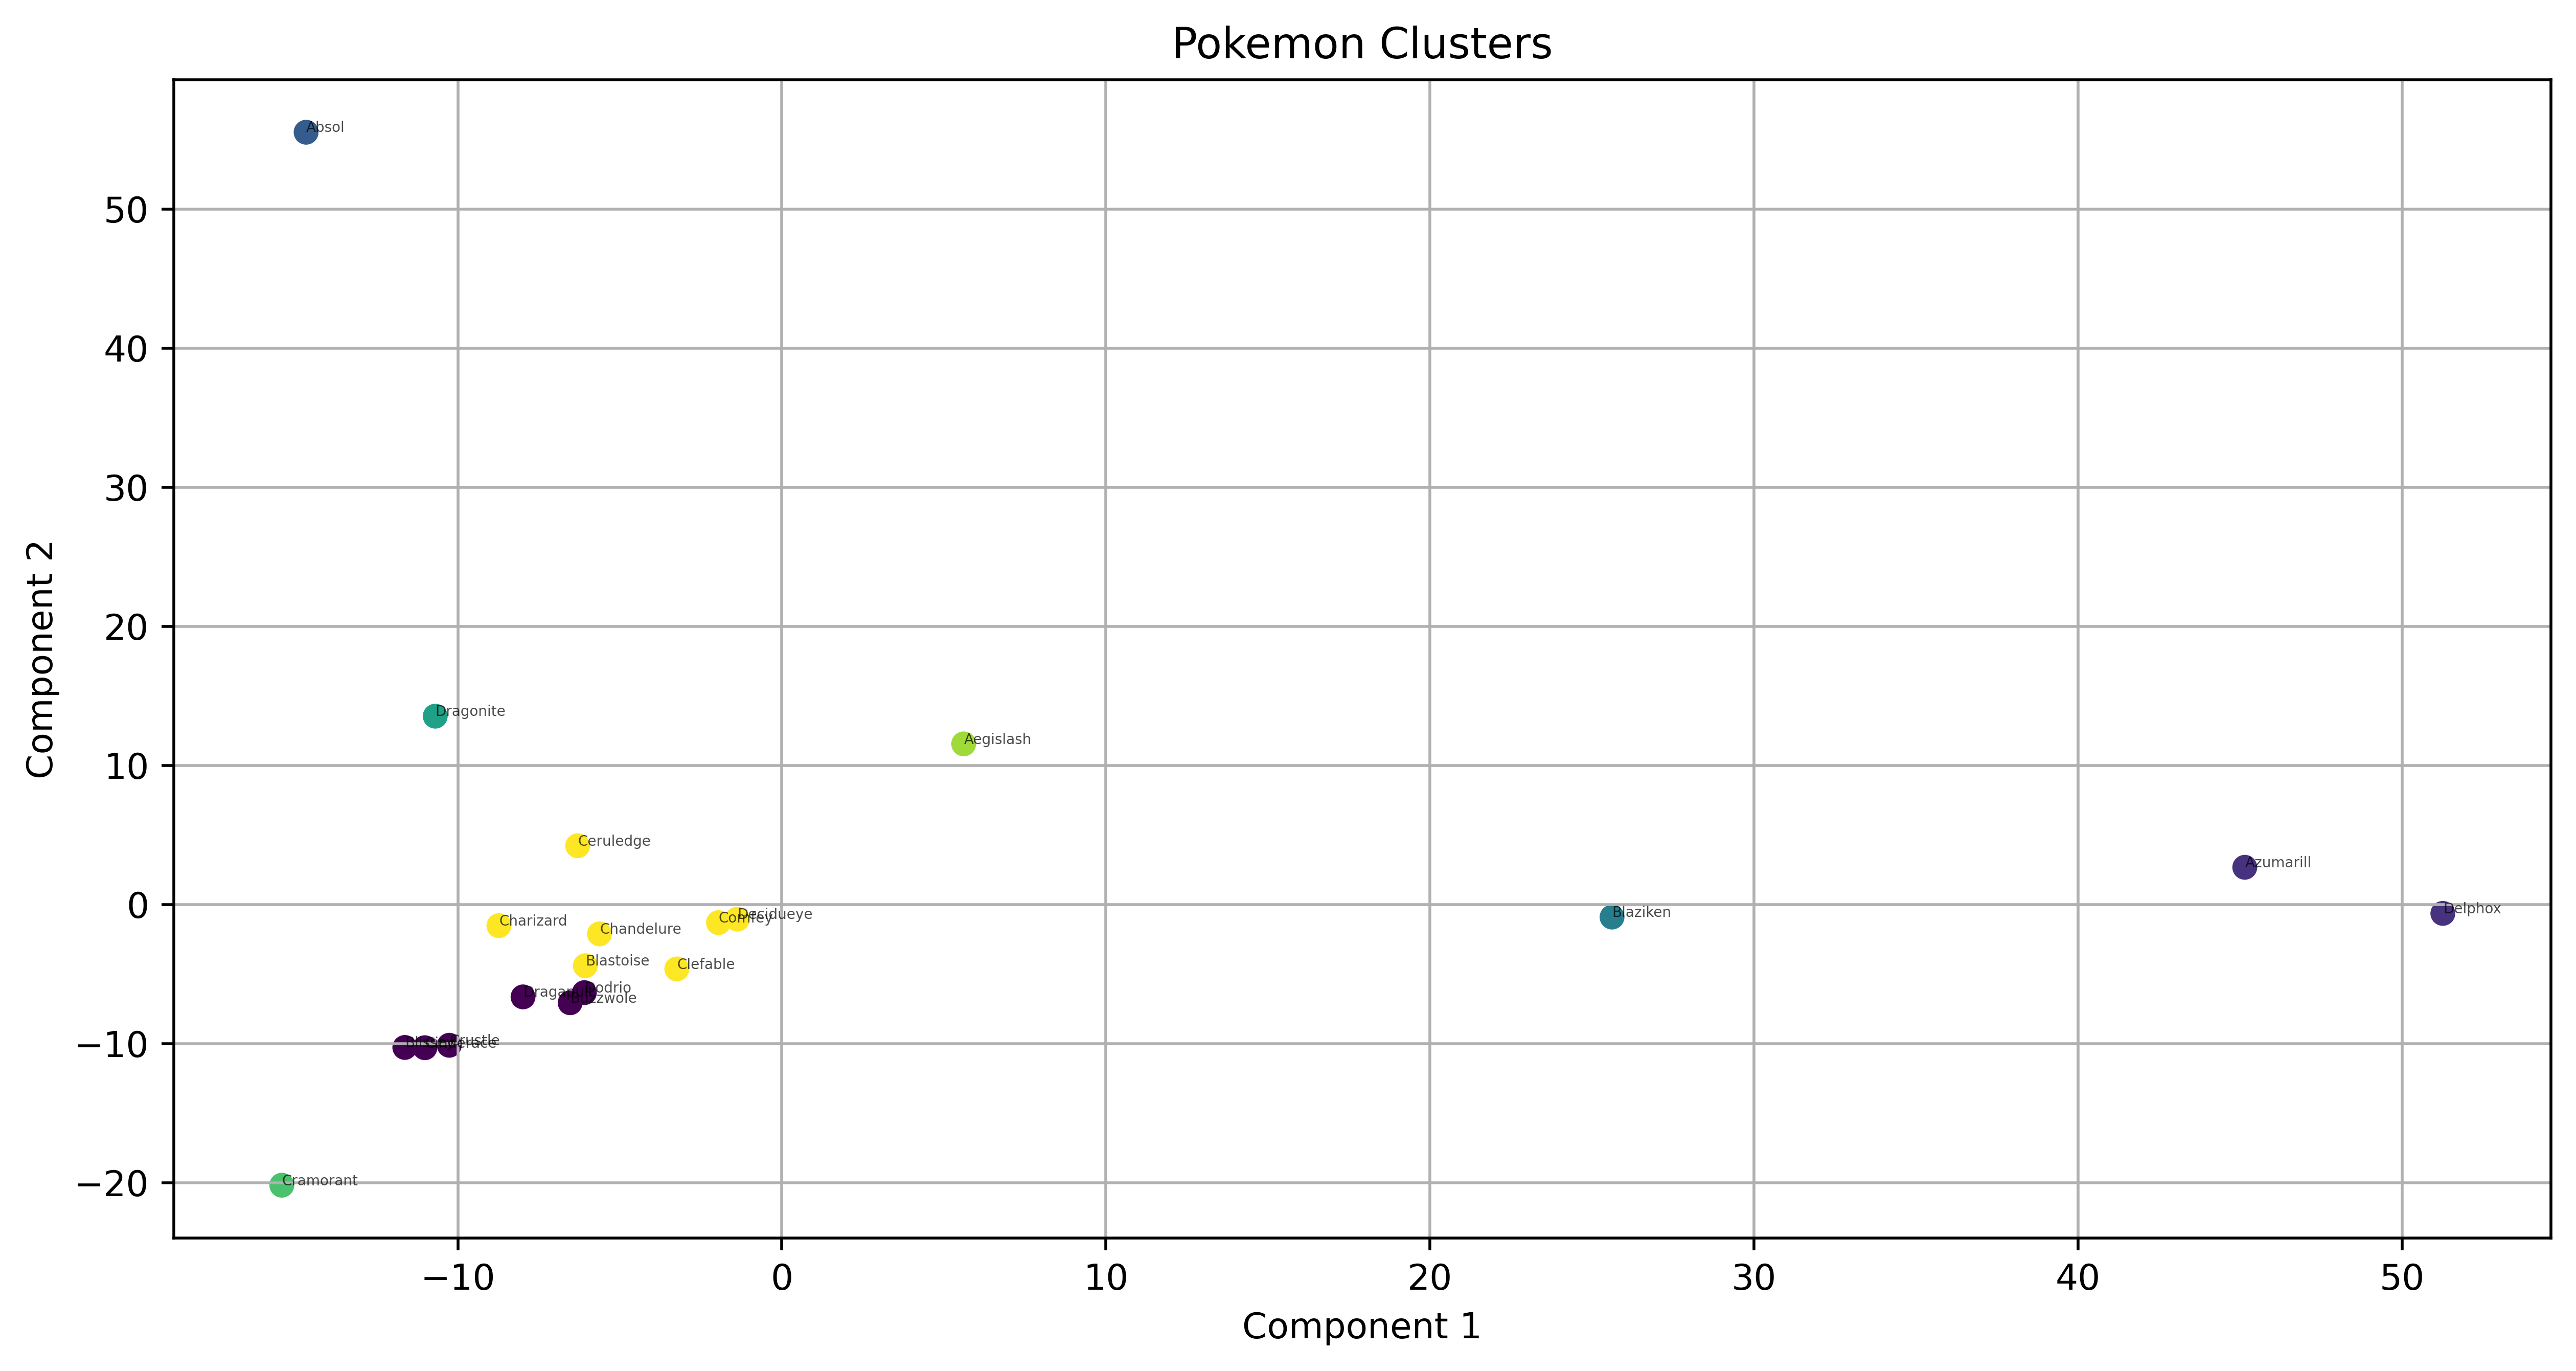

In [9]:
#### from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv("Pokemon Data 1.5.csv")
# Drop the first column and normalize the remaining data
labels = data.iloc[:,0]
data_values = data.drop(columns=['Pokemon'])
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Select the text columns to be vectorized
text_columns = data_values.select_dtypes(include=['object']).columns
print(text_columns)
# Create an empty DataFrame to store the tf-idf features
tfidf_features = pd.DataFrame()

# Apply TfidfVectorizer to each text column
for column in text_columns:
    tfidf_matrix = tfidf_vectorizer.fit_transform(data_values[column].astype('U'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{i}" for i in range(tfidf_matrix.shape[1])])
    tfidf_features = pd.concat([tfidf_features, tfidf_df], axis=1)

# Drop the original text columns from data_values
data_values = data_values.drop(columns=text_columns)

# Concatenate the original data_values with the tfidf_features DataFrame
data_values = pd.concat([data_values, tfidf_features], axis=1)
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_values)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Perform Kernel PCA with 2 components
kpca = KernelPCA(n_components=2, kernel='rbf')
kpca_data = kpca.fit_transform(scaled_data)

# Convert PCA and KPCA results to dataframes for easy handling
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
kpca_df = pd.DataFrame(kpca_data, columns=['PC1', 'PC2'])

clustering = KMeans(n_clusters=8).fit(pca_df)
print()
final = pd.concat([labels, pd.DataFrame(pca_df),pd.DataFrame(clustering.labels_) ], axis=1)
print(final)
# Plot the clustered KPCA data
plt.figure(figsize=(12, 6), dpi=500)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clustering.labels_, cmap='viridis', marker='o')
for i, txt in enumerate(labels):
    plt.annotate(txt, (pca_df['PC1'][i]+.005, pca_df['PC2'][i]+0.005), fontsize=4, alpha=0.7)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Pokemon Clusters')
plt.grid(True)
plt.show()